In [19]:
import pandas as pd
x = pd.read_csv('data.csv')
x.head()

,time [sec],Ce [mg/L]
0,2.642972,1008.122706
1,22.768317,1172.473508
2,46.138622,1236.300664
3,142.893663,1336.824310


In [20]:
x.tail()

,time [sec],Ce [mg/L]
0,2.642972,1008.122706
1,22.768317,1172.473508
2,46.138622,1236.300664
3,142.893663,1336.824310


In [21]:
x['time [sec]']

0      2.642972
1     22.768317
2     46.138622
3    142.893663
Name: time [sec], dtype: float64

In [22]:
x.describe()

,time [sec],Ce [mg/L]
count,4.000000,4.000000
mean,53.610893,1188.430297
std,62.118814,137.934527
min,2.642972,1008.122706
25%,17.736981,1131.385808
50%,34.453470,1204.387086
75%,70.327382,1261.431576
max,142.893663,1336.824310


In [23]:
import numpy as np
def Ce(x,a0,b0):
    return ((np.log(a0*b0))/b0) + ((1/b0)*np.log(x))

In [24]:
# sumsqrerror = 0
# sumsqrerror_other = 0

# for i in range(len(x['time [sec]'])):
#     sumsqrerror += (x['Ce [mg/L]'][i] - Ce(x['time [sec]'][i],2071.46959255922,0.00799506033945883))**2
#     sumsqrerror_other += (x['Ce [mg/L]'][i] - Ce(x['time [sec]'][i],7639.862140982285,0.009759692155))**2

# print("Error 1 is : ",sumsqrerror**2)
# print("Error 2 is : ",sumsqrerror_other**2)

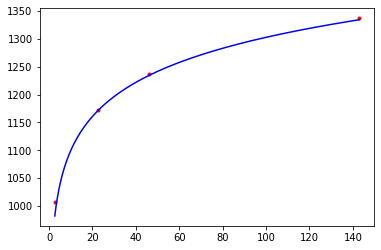

In [25]:
guess = [2303394.537,0.011343129]

%matplotlib inline
import matplotlib.pyplot as plt

n = len(x['time [sec]'])
y = np.empty(1000)
for i in range(1000):
    x_tmp = np.linspace(x['time [sec]'].min(),x['time [sec]'].max(),1000)
    y[i] = Ce(x_tmp[i],guess[0],guess[1])

plt.plot(x['time [sec]'],x['Ce [mg/L]'],'r.')
plt.plot(x_tmp,y,'b-')

a0 = 6438293.504030016251 b0 = 0.012195807682


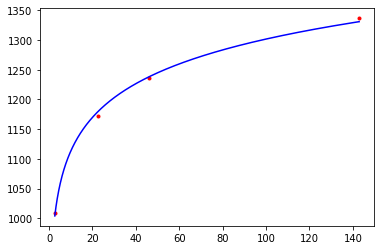

In [26]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(Ce, x['time [sec]'], x['Ce [mg/L]'], guess)
y = np.empty(1000)
for i in range(1000):
    x_tmp = np.linspace(x['time [sec]'].min(),x['time [sec]'].max(),1000)
    y[i] = Ce(x_tmp[i],popt[0],popt[1])

print('a0 = %.12f' % popt[0], 'b0 = %.12f' % popt[1])
plt.plot(x['time [sec]'],x['Ce [mg/L]'],'r.')
plt.plot(x_tmp,y,'b-')

In [27]:
from sklearn.metrics import r2_score

y_pred = []
for i in range(n):
    y_pred.append(Ce(x['time [sec]'][i],popt[0],popt[1]))
r2_score(x['Ce [mg/L]'],y_pred)

0.9979114121031811